In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

customer = pd.read_csv('datasets/segmentation data.csv')

customer.sample(10)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
418,100000419,1,1,31,1,175530,2,1
885,100000886,1,1,53,2,117005,1,1
590,100000591,1,1,58,2,87058,0,0
488,100000489,0,0,35,1,85033,0,0
1362,100001363,1,1,27,1,65560,0,0
1252,100001253,0,0,38,1,154339,1,2
1442,100001443,1,1,34,1,92652,0,0
910,100000911,1,1,34,1,136975,1,1
48,100000049,0,0,39,1,130500,0,0
1414,100001415,1,1,24,1,99570,1,1


In [2]:
features = customer.copy()
features = features.drop('ID', axis=1)
features.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [3]:
features.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 1.62334398,  1.38522854],
       [ 0.78917702, -1.09876467],
       [-0.86140445,  0.98226533],
       [ 1.33146671,  0.13164849],
       [ 1.1137295 ,  0.5265991 ],
       [-0.20395145,  0.2772139 ],
       [ 1.24105666,  0.52020179],
       [ 1.89637093, -0.58407432],
       [ 0.5561154 ,  2.11159165],
       [ 0.89670056, -0.45754161]])

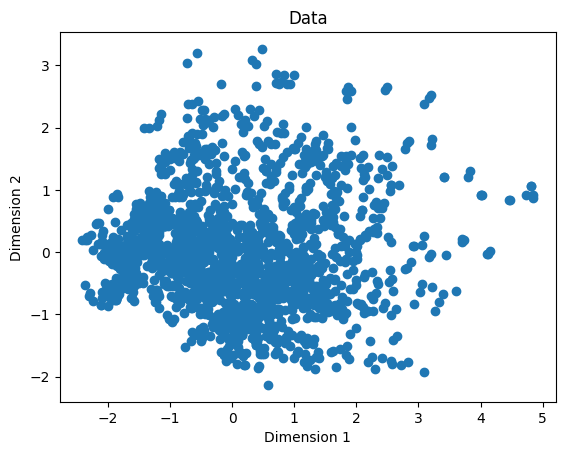

In [6]:
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'WCSS')

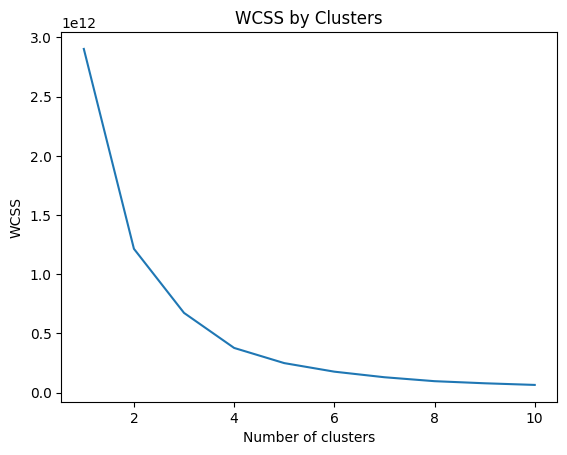

In [7]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(features)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [8]:
model = KMeans(n_clusters=4,init='k-means++',n_init=500,max_iter=1500)
km_clusters = model.fit_predict(features.values)
km_clusters

array([0, 3, 2, ..., 2, 0, 2])

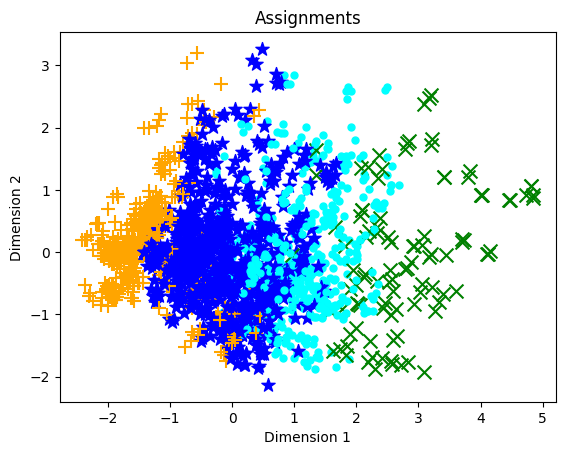

In [9]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [10]:
features['clusters'] = km_clusters
features.clusters = features.clusters.astype(str)
sorted_clusters = features.sort_values('clusters')

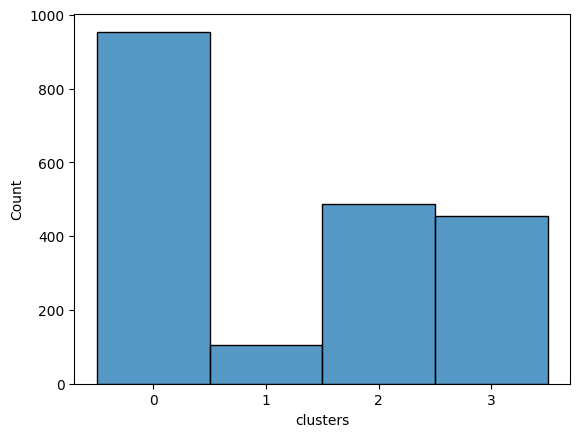

In [11]:
import seaborn as sns
sns.histplot(sorted_clusters['clusters'])
plt.show()